In [83]:
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.special import kolmogi

In [76]:
%reload_ext pycodestyle_magic
%pycodestyle_off

In [6]:
cats_df = pd.read_csv('сorrect_cats.csv')
cats_df = cats_df[['Sex', 'Bwt', 'Hwt']]
cats_males = cats_df.loc[cats_df['Sex'] == 'M']
cats_females = cats_df.loc[cats_df['Sex'] == 'F']

In [8]:
cats_df

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


# №1

In [128]:
data = np.array([])
for value in cats_males['Hwt']:
    data = np.concatenate([hwt_diff, np.array(value-cats_females['Hwt'])])

In [129]:
def mean_pivotal_boostrap_interval(data: list, alpha: float,
                                   num_of_samples: int):
    bootstrap_samples = []
    for _ in range(num_of_samples):
        new_bootstrap_sample = np.random.choice(hwt_diff, len(hwt_diff))
        bootstrap_samples.append(new_bootstrap_sample)
    bootstrap_estimations = list(map(np.mean, bootstrap_samples))
    mean_estimation = np.mean(hwt_diff)
    bootstrap_estimations = 2 * mean_estimation - bootstrap_estimations
    bootstrap_estimations.sort()
    lower_bound_num = math.floor(alpha * num_of_samples)
    upper_bound_num = math.floor((1-alpha) * num_of_samples)
    lower_bound = bootstrap_estimations[lower_bound_num]
    upper_bound = bootstrap_estimations[upper_bound_num]
    return (lower_bound, upper_bound)


def mean_percentile_boostrap_interval(data: list, alpha: float,
                                      num_of_samples: int):
    bootstrap_samples = []
    for _ in range(num_of_samples):
        new_bootstrap_sample = np.random.choice(hwt_diff, len(hwt_diff))
        bootstrap_samples.append(new_bootstrap_sample)
    bootstrap_estimations = list(map(np.mean, bootstrap_samples))
    bootstrap_estimations.sort()
    lower_bound_num = math.floor(alpha * num_of_samples)
    upper_bound_num = math.floor((1-alpha) * num_of_samples)
    lower_bound = bootstrap_estimations[lower_bound_num]
    upper_bound = bootstrap_estimations[upper_bound_num]
    return (lower_bound, upper_bound)

1:1: E302 expected 2 blank lines, found 0


In [130]:
pivotal_interval = mean_pivotal_boostrap_interval(hwt_diff, 0.05, 100)
percentile_interval = mean_percentile_boostrap_interval(hwt_diff, 0.05, 100)
print('pivotal: ({:.4}, {:.4})'.format(pivotal_interval[0],
                                       pivotal_interval[1]))
print('percentile: ({:.4}, {:.4})'.format(percentile_interval[0],
                                          percentile_interval[1]))

pivotal: (2.054, 2.209)
percentile: (2.06, 2.188)


# №2

# №3

In [125]:
data = np.array(cats_df['Bwt'])

In [126]:
# Dvoretzky–Kiefer–Wolfowitz
def dkv_conf_interval(x: float, data: list, alpha: float):
    data_size = len(data)
    eps = math.sqrt(-math.log(0.5*alpha) / (2*data_size))
    lower_bound = max(ECDF(data)(x) - eps, 0)
    upper_bound = min(ECDF(data)(x) + eps, 1)
    return (lower_bound, upper_bound)


def kolmogorov_conf_interval(x: float, data: list, alpha: float):
    data_size = len(data)
    lower_bound = max(ECDF(data)(x) -
                      kolmogi(1 - alpha)/math.sqrt(data_size), 0)
    upper_bound = min(ECDF(data)(x) +
                      kolmogi(1 - alpha)/math.sqrt(data_size), 1)
    return (lower_bound, upper_bound)

2:1: E302 expected 2 blank lines, found 0


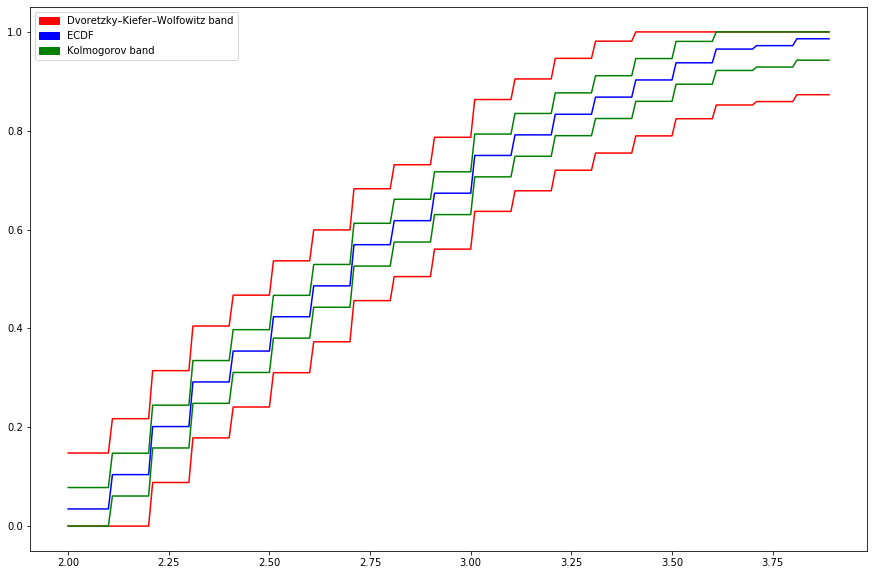

In [127]:
x = np.arange(min(data), max(data), 0.01)
dkv_lower_bound_values = [dkv_conf_interval(x_val, data, 0.05)[0]
                          for x_val in x]
dkv_upper_bound_values = [dkv_conf_interval(x_val, data, 0.05)[1]
                          for x_val in x]
kolm_lower_bound_values = [kolmogorov_conf_interval(x_val, data, 0.05)[0]
                           for x_val in x]
kolm_upper_bound_values = [kolmogorov_conf_interval(x_val, data, 0.05)[1]
                           for x_val in x]
plt.figure(figsize=(15, 10))
red_patch = mpatches.Patch(color='red',
                           label='Dvoretzky–Kiefer–Wolfowitz band')
green_patch = mpatches.Patch(color='green', label='Kolmogorov band')
blue_patch = mpatches.Patch(color='blue', label='ECDF')
plt.legend(handles=[red_patch, blue_patch, green_patch], loc='upper left')
plt.plot(x, dkv_lower_bound_values, 'r')
plt.plot(x, ECDF(data)(x), 'b')
plt.plot(x, dkv_upper_bound_values, 'r')
plt.plot(x, kolm_lower_bound_values, 'g')
plt.plot(x, kolm_upper_bound_values, 'g')
plt.show()